In [1]:
from __future__ import print_function
from matplotlib import pyplot as plt
# get_ipython().magic(u'matplotlib auto')
import tensorflow as tf
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
# import torch
from tensorflow import keras
# config = tf.ConfigProto( device_count = {'GPU': 0 } )
# sess = tf.Session(config=config)
# keras.backend.set_session(sess)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Activation
from tensorflow import reshape
from keras.utils import np_utils
from tensorflow.keras.layers import Conv1D,Conv2D, MaxPooling1D,AveragePooling1D
from tensorflow.keras.layers import DepthwiseConv2D
from tensorflow.keras.layers import MaxPooling3D
from tensorflow.keras.layers import SeparableConv1D, GlobalAveragePooling2D
from tensorflow.keras.layers import ZeroPadding2D,ZeroPadding1D, MaxPooling2D, Bidirectional
from tensorflow.keras.regularizers import l2,l1
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from scipy.io import loadmat
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import mean
from numpy import std
# import coremltools
# from torch import nn, optim
# import torch.nn.functional as F
import scipy.io
from scipy import stats
from IPython.display import display, HTML
from tensorflow.keras import optimizers
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU, SimpleRNN
from tensorflow.keras.layers import TimeDistributed
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
def historyVisualization(history):
    # Plot training & validation loss values
    plt.plot(history.history['mean_squared_error'])
    plt.plot(history.history['mean_absolute_error'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['MSE', 'MAE'], loc='upper left')
    plt.show()
def plotPredict(y_pred, y_test):
    plt.title('Predicted vs Actual')
    plt.xlabel('x')
    plt.ylabel('value')
    plt.plot(y_pred, label='Predicted')
    plt.plot(y_test, label='Actual ')
    plt.legend()
    plt.show()

In [3]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(20, 14))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [4]:
N_FEATURES = 8

In [5]:
column_names = ['C'+str(j) for j in range(1, N_FEATURES+1)]
lst = ['Class_label']
column_names = column_names+lst
print(column_names)

['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'Class_label']


In [6]:
def read_data_Train(file_path_Train):
    df_Train = pd.read_csv(file_path_Train,header=None,names=column_names)
    # Last column has a ";" character which must be removed ...
    df_Train['Class_label'].replace(regex=True,inplace=True,to_replace=r';',value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Train['Class_label'] = df_Train['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Train.dropna(axis=0, how='any', inplace=True)
    return df_Train

In [7]:
def convert_to_float(x):
    try:
        return float(x)
    except:
        return np.nan

In [8]:
def show_basic_dataframe_info(dataframe):
    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))

In [9]:
def read_data_Test(file_path_Test):
    df_Test = pd.read_csv(file_path_Test,header=None,names=column_names)
    # Last column has a ";" character which must be removed ...
    df_Test['Class_label'].replace(regex=True,inplace=True,to_replace=r';',value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Test['Class_label'] = df_Test['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Test.dropna(axis=0, how='any', inplace=True)
    return df_Test

In [10]:
# path='/media/naveen/nav/mat_codes/BioPatRec/prep_wave/Total_process_TT/'
# path='/media/naveen/nav/mat_codes/BioPatRec/prep_WOR_BP_D2/Total_process_TT/'
# path='/media/naveen/nav/mat_codes/BioPatRec/prep_seg_CW_WOR_BP_D2/Total_process_TT/'
# naveen_prep
path='/media/naveen/nav/mat_codes/physical_data/prep_nlw_naveen/Total_process_TT/'
# olsson_prep
# path='/media/naveen/nav/mat_codes/BioPatRec/olsson_prep_WOR_BP_D2/Total_process_TT/'

In [11]:
# file_path_train=path+'Biopatrec_26class_17sub_train'+'.'+'csv'
# file_path_train=path+'Biopatrec_WOR_BP_D2_train'+'.'+'csv'
# file_path_train=path+'Biopatrec_seg_CW_WOR_BP_D2_train'+'.'+'csv'
# naveen_path
file_path_train=path+'phy_pro_nlw_Train'+'.'+'csv'
# olsson_path
# file_path_train=path+'Biopatrec_olsson_WOR_BP_D2_train'+'.'+'csv'
print(file_path_train)

/media/naveen/nav/mat_codes/physical_data/prep_nlw_naveen/Total_process_TT/phy_pro_nlw_Train.csv


In [12]:
# file_path_test=path+'Biopatrec_26class_17sub_test'+'.'+'csv'
# file_path_test=path+'Biopatrec_WOR_BP_D2_test'+'.'+'csv'
# file_path_test=path+'Biopatrec_seg_CW_WOR_BP_D2_test'+'.'+'csv'
# naveen_path
file_path_test=path+'phy_pro_nlw_Test'+'.'+'csv'
# olsson_path
# file_path_test=path+'Biopatrec_olsson_WOR_BP_D2_test'+'.'+'csv'
print(file_path_test)

/media/naveen/nav/mat_codes/physical_data/prep_nlw_naveen/Total_process_TT/phy_pro_nlw_Test.csv


In [13]:
df_Train = read_data_Train(file_path_train)
# Describe the data
show_basic_dataframe_info(df_Train)
df_Train.head(10)

Number of columns in the dataframe: 9
Number of rows in the dataframe: 586080



,C1,C2,C3,C4,C5,C6,C7,C8,Class_label
0,369.97,245.97,1803.400,189.56,4057.30,484.290,3988.300,3973.4,1.0
1,544.34,253.18,93.440,290.86,3893.70,286.200,3991.400,3959.3,1.0
2,874.14,257.66,2698.000,429.22,3739.60,55.664,3851.200,3939.7,1.0
3,1335.10,247.70,3418.300,470.09,3903.40,48.997,3603.600,3911.6,1.0
4,1773.70,233.99,3094.500,457.78,3751.50,63.277,3112.300,3884.8,1.0
5,2201.40,229.76,3278.700,472.60,2812.40,145.410,2144.100,3871.2,1.0
6,2235.90,230.95,3347.300,481.79,532.34,211.780,1055.600,3864.5,1.0
7,1330.70,234.11,2593.600,451.30,2071.80,172.420,401.740,3861.2,1.0
8,144.60,230.43,1391.600,398.51,3550.60,95.025,27.448,3859.1,1.0
9,418.54,206.18,87.075,331.63,3933.90,49.058,510.760,3848.3,1.0


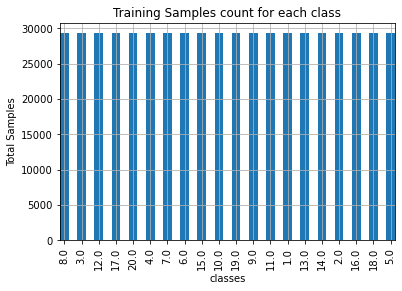

In [14]:
df_Train['Class_label'].value_counts().plot(kind='bar',
                                   title='Training Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

In [15]:
df_Test = read_data_Test(file_path_test)
# Describe the data
show_basic_dataframe_info(df_Test)
df_Test.head(10)

Number of columns in the dataframe: 9
Number of rows in the dataframe: 213120



,C1,C2,C3,C4,C5,C6,C7,C8,Class_label
0,3127.20,229.61,2330.00,0.61069,922.46,174.1000,3888.3,3989.4,1.0
1,581.29,117.35,450.37,37.27200,991.22,140.5000,3890.9,3962.8,1.0
2,2205.20,654.39,2018.50,88.16500,1103.20,103.7400,3895.9,3937.0,1.0
3,3553.40,1395.10,3196.20,153.45000,1249.20,73.3350,3903.4,3921.3,1.0
4,3514.90,2185.80,2769.00,211.05000,1390.30,47.7070,3910.1,3912.2,1.0
5,3507.60,3055.60,649.21,242.51000,1528.20,22.0040,3914.8,3907.8,1.0
6,3250.50,3379.20,1927.20,223.06000,1440.40,4.6594,3909.5,3901.6,1.0
7,2302.60,2586.70,3399.50,125.41000,937.42,33.6980,3885.9,3881.7,1.0
8,1477.90,905.54,3445.50,28.83800,164.09,63.8490,3853.0,3865.1,1.0
9,1762.40,1211.00,1961.40,200.37000,728.61,92.8230,3821.6,3869.8,1.0


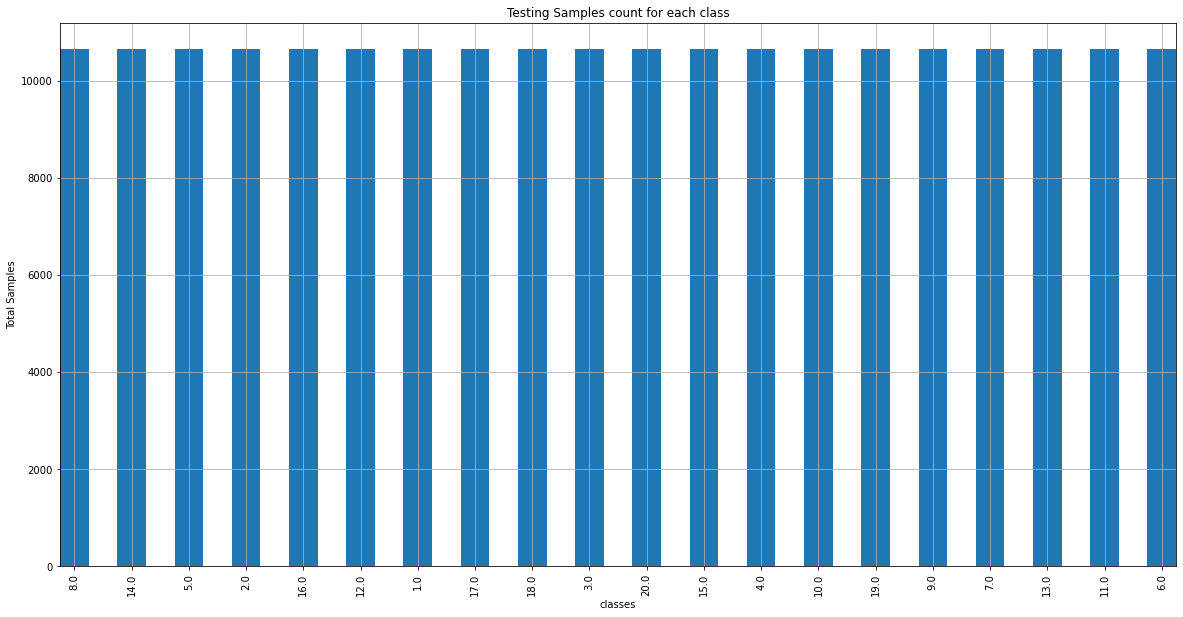

In [16]:
df_Test['Class_label'].value_counts().plot(kind='bar',
                                   title='Testing Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

In [17]:
pd.options.display.float_format = "{:,.5f}".format
df_Train.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,Class_label
0,369.97000,245.97000,"1,803.40000",189.56000,"4,057.30000",484.29000,"3,988.30000","3,973.40000",1.00000
1,544.34000,253.18000,93.44000,290.86000,"3,893.70000",286.20000,"3,991.40000","3,959.30000",1.00000
2,874.14000,257.66000,"2,698.00000",429.22000,"3,739.60000",55.66400,"3,851.20000","3,939.70000",1.00000
3,"1,335.10000",247.70000,"3,418.30000",470.09000,"3,903.40000",48.99700,"3,603.60000","3,911.60000",1.00000
4,"1,773.70000",233.99000,"3,094.50000",457.78000,"3,751.50000",63.27700,"3,112.30000","3,884.80000",1.00000


In [18]:
scaler = preprocessing.StandardScaler().fit(df_Train.iloc[:,0:N_FEATURES])

In [19]:
df_Train.iloc[:,0:N_FEATURES]=scaler.transform(df_Train.iloc[:,0:N_FEATURES])

In [20]:
pd.options.display.float_format = "{:,.5f}".format
df_Train.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,Class_label
0,-0.19296,-0.10095,1.58102,-0.23043,2.09460,-0.20288,2.68584,2.78646,1.00000
1,0.01003,-0.08984,-0.45569,-0.08395,1.97711,-0.38843,2.68845,2.77407,1.00000
2,0.39396,-0.08293,2.64656,0.11613,1.86644,-0.60438,2.57072,2.75684,1.00000
3,0.93058,-0.09828,3.50450,0.17523,1.98407,-0.61063,2.36280,2.73213,1.00000
4,1.44117,-0.11942,3.11883,0.15743,1.87498,-0.59725,1.95025,2.70857,1.00000


In [21]:
pd.options.display.float_format = "{:,.5f}".format
df_Test.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,Class_label
0,"3,127.20000",229.61000,"2,330.00000",0.61069,922.46000,174.10000,"3,888.30000","3,989.40000",1.00000
1,581.29000,117.35000,450.37000,37.27200,991.22000,140.50000,"3,890.90000","3,962.80000",1.00000
2,"2,205.20000",654.39000,"2,018.50000",88.16500,"1,103.20000",103.74000,"3,895.90000","3,937.00000",1.00000
3,"3,553.40000","1,395.10000","3,196.20000",153.45000,"1,249.20000",73.33500,"3,903.40000","3,921.30000",1.00000
4,"3,514.90000","2,185.80000","2,769.00000",211.05000,"1,390.30000",47.70700,"3,910.10000","3,912.20000",1.00000


In [22]:
df_Test.iloc[:,0:N_FEATURES]=scaler.transform(df_Test.iloc[:,0:N_FEATURES])

In [23]:
pd.options.display.float_format = "{:,.5f}".format
df_Test.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,Class_label
0,3.01683,-0.12617,2.20824,-0.50366,-0.15676,-0.49344,2.60187,2.80053,1.00000
1,0.05305,-0.29922,-0.03056,-0.45065,-0.10737,-0.52491,2.60405,2.77715,1.00000
2,1.94350,0.52865,1.83722,-0.37706,-0.02695,-0.55935,2.60825,2.75446,1.00000
3,3.51299,1.67048,3.23996,-0.28265,0.07790,-0.58783,2.61455,2.74066,1.00000
4,3.46817,2.88938,2.73113,-0.19936,0.17923,-0.61184,2.62018,2.73266,1.00000


In [24]:
LABEL = 'ActivityEncoded'
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
df_Train[LABEL] = le.fit_transform(df_Train['Class_label'].values.ravel())
# df_Valid[LABEL] = le.fit_transform(df_Valid['Class_label'].values.ravel())
df_Test[LABEL] = le.fit_transform(df_Test['Class_label'].values.ravel())
print('df_train_size',df_Train)
# print('df_valid_size',df_Valid)
print('df_test_size',df_Test)

df_train_size              C1       C2       C3       C4       C5       C6       C7  \
0      -0.19296 -0.10095  1.58102 -0.23043  2.09460 -0.20288  2.68584   
1       0.01003 -0.08984 -0.45569 -0.08395  1.97711 -0.38843  2.68845   
2       0.39396 -0.08293  2.64656  0.11613  1.86644 -0.60438  2.57072   
3       0.93058 -0.09828  3.50450  0.17523  1.98407 -0.61063  2.36280   
4       1.44117 -0.11942  3.11883  0.15743  1.87498 -0.59725  1.95025   
...         ...      ...      ...      ...      ...      ...      ...   
586075 -0.52875 -0.45877 -0.56017 -0.48761 -0.79829 -0.61327 -0.60619   
586076 -0.39921 -0.46184 -0.55922 -0.49125 -0.79878 -0.61330 -0.60484   
586077 -0.01584 -0.44789 -0.56011 -0.49526 -0.80186 -0.61806 -0.60664   
586078  0.33445 -0.42998 -0.56218 -0.49900 -0.80632 -0.62570 -0.61044   
586079  0.56307 -0.42117 -0.56459 -0.50194 -0.81086 -0.63724 -0.63018   

             C8  Class_label  ActivityEncoded  
0       2.78646      1.00000                0  
1       2.774

In [25]:
# 15 function to segment data into trial lengths (trial length =513 samples in this dataset)
def create_segments_and_labels(df, time_steps,step,n_features, label_name):
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
      for j in range(1, n_features+1):
        L = ('C'+str(j)) 
        segments.append(df[str(L)].values[i: i + time_steps])
      label = stats.mode(df[label_name][i: i + time_steps])[0][0]
      labels.append(label)
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, n_features)
    labels = np.asarray(labels)
    return reshaped_segments, labels

In [26]:
# The number of steps within one time segment
TIME_PERIODS = 666
# The steps to take from one segment to the next; if this value is equal to
# TIME_PERIODS, then there is no overlap between the segments
STEP_DISTANCE = 666

In [27]:
x_train, y_train = create_segments_and_labels(df_Train,TIME_PERIODS,STEP_DISTANCE,N_FEATURES,LABEL)
print('x_train shape: ', x_train.shape)
# print(x_train)
print(x_train.shape[0], 'training samples')
print('y_train shape: ', y_train.shape)
# Set input & output dimensions
num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
print(num_time_periods)
print(num_sensors)
num_classes = le.classes_.size
print(list(le.classes_))
# input_shape = (num_time_periods,num_sensors)
# print(input_shape)
input_shape = (num_time_periods,num_sensors)
#x_train = x_train.reshape(x_train.shape[0], input_shape)
print('x_train shape:', x_train[0].shape)
# print('input_shape:', input_shape)
# print('input_shape[0]',input_shape[0])
# print('input_shape[1]',input_shape[1])
# print('input_shape[-1]',input_shape[-1])
x_train = x_train.astype('float32')
# x_train = [torch.tensor(arr, dtype=torch.float32) for arr in x_train]
# y_train = y_train.astype('float32')
# print(y_train)
y_train_hot = np_utils.to_categorical(y_train, num_classes)
print(y_train_hot)
# y_train_hot= [torch.tensor(arr, dtype=torch.uint8) for arr in y_train_hot]
print('New y_train shape: ', y_train_hot.shape)

x_train shape:  (879, 666, 8)
879 training samples
y_train shape:  (879,)
666
8
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]
x_train shape: (666, 8)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
New y_train shape:  (879, 20)


In [28]:
x_test, y_test = create_segments_and_labels(df_Test,TIME_PERIODS,STEP_DISTANCE,N_FEATURES,LABEL)
print('x_test shape: ', x_test.shape)
# print(x_train)
print(x_test.shape[0], 'testing samples')
print('y_test shape: ', y_test.shape)
# Set input_shape / reshape for Keras
#x_test = x_test.reshape(x_test.shape[0], input_shape)
x_test = x_test.astype('float32')
#y_test = y_test.astype('float32')
#print(y_test)
y_test_hot = np_utils.to_categorical(y_test, num_classes)
print(y_test_hot)

x_test shape:  (319, 666, 8)
319 testing samples
y_test shape:  (319,)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [137]:
# n_steps, n_length = 20, 25
# n_steps, n_length= 10, 50
# n_steps, n_length= 16, 32
# n_steps, n_length, n_depth = 15, 400, 8
n_steps, n_length, n_depth, n_chan = 74, 9, 8, 1
# x_train = x_train.reshape(x_train.shape[0], n_steps, n_length, n_depth)
x_train = x_train.reshape(x_train.shape[0], n_steps, n_length, n_depth,n_chan)
print('x_train shape: ', x_train.shape)
# # x_valid = x_valid.reshape(x_valid.shape[0], n_steps, n_length, n_depth)
# # print('x_valid shape: ', x_valid.shape)
# x_test = x_test.reshape(x_test.shape[0], n_steps, n_length,n_depth)
x_test = x_test.reshape(x_test.shape[0], n_steps, n_length,n_depth,n_chan)
print('x_test shape: ', x_test.shape)
n_outputs = y_train_hot.shape[1]
#print('n_outputs',n_outputs)

x_train shape:  (879, 74, 9, 8, 1)
x_test shape:  (319, 74, 9, 8, 1)


In [138]:
# n_steps = TIME_PERIODS
# n_vector = N_FEATURES

In [139]:
# n_vector =  n_length*n_depth
# print(n_vector)
# x_train = x_train.reshape(x_train.shape[0], n_steps, n_vector)
# print('x_train shape: ', x_train.shape)
# x_test = x_test.reshape(x_test.shape[0], n_steps, n_vector)
# print('x_test shape: ', x_test.shape)

In [140]:
#seq_len = n_steps
seq_len = x_train.shape[1]
n_channel = x_train.shape[-1]
# n_vector = 64
d_k = 64
d_v = 64
n_heads = 8
ff_dim = 2048
# ff_dim2 = 1024
N_depth = 2
N_depth1 = 2

In [141]:
from tensorflow.keras.models import *
from tensorflow.keras.layers import *

In [142]:
#@save
class PositionWiseFFN(tf.keras.layers.Layer):
    """Positionwise feed-forward network."""
    def __init__(self, ffn_num_hiddens, ffn_num_outputs, **kwargs):
        super().__init__(*kwargs)
        self.dense1 = tf.keras.layers.Dense(ffn_num_hiddens)
        self.relu = tf.keras.layers.ReLU()
        self.dense2 = tf.keras.layers.Dense(ffn_num_outputs)

    def call(self, X):
        return self.dense2(self.relu(self.dense1(X)))

In [143]:
# 22 Transformer encoder
class TransformerEncoder(Layer):
  def __init__(self, d_k, d_v, n_heads, ff_dim, dropout=0.3, **kwargs):
    super(TransformerEncoder, self).__init__()
    self.d_k = d_k
    self.d_v = d_v
    self.n_heads = n_heads
    self.ff_dim = ff_dim
    self.attn_heads = list()
    self.dropout_rate = dropout

  def build(self, input_shape):
    self.attn_multi = MultiAttention(self.d_k, self.d_v, self.n_heads)
    self.attn_dropout = Dropout(self.dropout_rate)
    self.attn_normalize = LayerNormalization(input_shape=input_shape, epsilon=1e-6)
    # print('input_shape',inputshape)
#     self.ffn = PositionWiseFFN(self.ff_dim, input_shape[0][-1])
    self.ff_dense1 = Dense(self.ff_dim,input_shape=input_shape,activation="tanh")
    self.ff_dense2 = Dense(input_shape[0][-1],input_shape=input_shape)
#     self.ff_conv1D_1 = Conv1D(filters=self.ff_dim, kernel_size=1, padding="same", activation='relu')
#     self.ff_conv1D_2 = Conv1D(filters=input_shape[0][-1], padding="same", kernel_size=1) 
    self.ff_dropout = Dropout(self.dropout_rate)
    self.ff_normalize = LayerNormalization(input_shape=input_shape, epsilon=1e-6)    
  
  def call(self, inputs): # inputs = (in_seq, in_seq, in_seq)
    attn_layer = self.attn_multi(inputs)
    attn_layer = self.attn_dropout(attn_layer)
    attn_out = self.attn_normalize(inputs[0] + attn_layer)

#     ff_layer = self.ffn(attn_out)
    ff_layer = self.ff_dense1(attn_out)
    ff_layer = self.ff_dense2(ff_layer)
#     ff_layer = self.ff_dropout(ff_layer)
    ff_out = self.ff_normalize(attn_out + ff_layer)
#     print("ff_layer",ff_layer.shape)
    return ff_out 

  def get_config(self): # Needed for saving and loading model with custom layer
    config = super().get_config().copy()
    config.update({'d_k': self.d_k,
                   'd_v': self.d_v,
                   'n_heads': self.n_heads,
                   'ff_dim': self.ff_dim,
#                    'ff_dim2': self.ff_dim2,
                   'attn_heads': self.attn_heads,
                   'dropout_rate': self.dropout_rate})
    return config  

In [144]:
# 23 Single and multiattention functions
class SingleAttention(Layer):
  def __init__(self, d_k, d_v):
    super(SingleAttention, self).__init__()
    self.d_k = d_k
    self.d_v = d_v

  def build(self, input_shape):
    self.query = Dense(self.d_k, 
                       input_shape=input_shape, 
                       kernel_initializer='glorot_uniform', 
                       bias_initializer='glorot_uniform')
    
    self.key = Dense(self.d_k, 
                     input_shape=input_shape, 
                     kernel_initializer='glorot_uniform', 
                     bias_initializer='glorot_uniform')
    
    self.value = Dense(self.d_v, 
                       input_shape=input_shape, 
                       kernel_initializer='glorot_uniform', 
                       bias_initializer='glorot_uniform')

  def call(self, inputs): # inputs = (in_seq, in_seq, in_seq)

    q = self.query(inputs[0])
    k = self.key(inputs[1])
#     print("q_shape",q.shape)
#     print("k_shape",k.shape)
    attn_weights = tf.matmul(q, k, transpose_b=True)
#     attn_weights = tf.math.add(q, k)
#     print("attn_shape", attn_weights.shape)
    attn_weights = tf.map_fn(lambda x: x/np.sqrt(self.d_k), attn_weights)
#     print("attn_shape", attn_weights.shape)
    attn_weights = tf.nn.softmax(attn_weights, axis=-1)
#     print("attn_shape", attn_weights.shape)
    
    v = self.value(inputs[2])
#     print("v_shape",v.shape)
    attn_out = tf.matmul(attn_weights, v)
#     attn_out = tf.math.add(attn_weights, v)
#     print("v1_shape",attn_out.shape)
    return attn_out     

In [145]:
class MultiAttention(Layer):
  def __init__(self, d_k, d_v, n_heads):
    super(MultiAttention, self).__init__()
    self.d_k = d_k
    self.d_v = d_v
    self.n_heads = n_heads
    self.attn_heads = list()

  def build(self, input_shape):
    for n in range(self.n_heads):
      self.attn_heads.append(SingleAttention(self.d_k, self.d_v))  
    
    # input_shape[0]=(batch, seq_len, 7), input_shape[0][-1]=7 
    self.linear = Dense(input_shape[0][-1], 
                        input_shape=input_shape, 
                        kernel_initializer='glorot_uniform', 
                        bias_initializer='glorot_uniform')

  def call(self, inputs):
    attn = [self.attn_heads[i](inputs) for i in range(self.n_heads)]
#     print("multi_out",len(attn))
    concat_attn = tf.concat(attn, axis=-1)
#     concat_attn = tf.transpose(concat_attn,perm=[0,2, 1])
#     print("concat_out",concat_attn.shape)
    multi_linear = self.linear(concat_attn)
#     print("multi_linear",multi_linear.shape)
    return multi_linear 

In [146]:
# 24 Time to vector conversion
class Time2Vector(Layer):
  def __init__(self, seq_len, **kwargs):
    super(Time2Vector, self).__init__()
    self.seq_len = seq_len

  def build(self, input_shape):
    '''Initialize weights and biases with shape (batch, seq_len)'''
    self.weights_linear = self.add_weight(name='weight_linear',
                                shape=(int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)
    
    self.bias_linear = self.add_weight(name='bias_linear',
                                shape=(int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)
    
    self.weights_periodic = self.add_weight(name='weight_periodic',
                                shape=(int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)

    self.bias_periodic = self.add_weight(name='bias_periodic',
                                shape=(int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)

  def call(self, x):
    '''Calculate linear and periodic time features'''
    x = tf.math.reduce_mean(x[:,:,:4], axis=-1) 
    time_linear = self.weights_linear * x + self.bias_linear # Linear time feature
    time_linear = tf.expand_dims(time_linear, axis=-1) # Add dimension (batch, seq_len, 1)
    
    time_periodic = tf.math.sin(tf.multiply(x, self.weights_periodic) + self.bias_periodic)
    time_periodic = tf.expand_dims(time_periodic, axis=-1) # Add dimension (batch, seq_len, 1)
    return tf.concat([time_linear, time_periodic], axis=-1) # shape = (batch, seq_len, 2)
   
  def get_config(self): # Needed for saving and loading model with custom layer
    config = super().get_config().copy()
    config.update({'seq_len': self.seq_len})
    return config

In [147]:
# 22 Transformer encoder
class TransformerEncoder2(Layer):
  def __init__(self, d_k, d_v, n_heads, ff_dim, dropout=0.3, **kwargs):
    super(TransformerEncoder2, self).__init__()
    self.d_k = d_k
    self.d_v = d_v
    self.n_heads = n_heads
    self.ff_dim = ff_dim
    self.attn_heads = list()
    self.dropout_rate = dropout

  def build(self, input_shape):
    self.attn_multi = MultiAttention2(self.d_k, self.d_v, self.n_heads)
    self.attn_dropout = Dropout(self.dropout_rate)
    self.attn_normalize = LayerNormalization(input_shape=input_shape, epsilon=1e-6)
    # print('input_shape',inputshape)
    self.ffn = PositionWiseFFN(self.ff_dim, input_shape[0][-1])
#     self.ff_dense1 = Dense(self.ff_dim,input_shape=input_shape,activation="tanh")
#     self.ff_dense2 = Dense(input_shape[0][-1],input_shape=input_shape,activation="tanh")
#     self.ff_conv1D_1 = Conv1D(filters=self.ff_dim, kernel_size=1, padding="same", activation='relu')
#     self.ff_conv1D_2 = Conv1D(filters=input_shape[0][-1], padding="same", kernel_size=1) 
    self.ff_dropout = Dropout(self.dropout_rate)
    self.ff_normalize = LayerNormalization(input_shape=input_shape, epsilon=1e-6)    
  
  def call(self, inputs): # inputs = (in_seq, in_seq, in_seq)
    attn_layer = self.attn_multi(inputs)
    attn_layer = self.attn_dropout(attn_layer)
    attn_out = self.attn_normalize(inputs[0] + attn_layer)

    ff_layer = self.ffn(attn_out)
#     ff_layer = self.ff_dense1(attn_out)
#     ff_layer = self.ff_dense2(ff_layer)
#     ff_layer = self.ff_dropout(ff_layer)
    ff_out = self.ff_normalize(attn_out + ff_layer)
#     print("ff_layer",ff_layer.shape)
    return ff_out 

  def get_config(self): # Needed for saving and loading model with custom layer
    config = super().get_config().copy()
    config.update({'d_k': self.d_k,
                   'd_v': self.d_v,
                   'n_heads': self.n_heads,
                   'ff_dim': self.ff_dim,
#                    'ff_dim2': self.ff_dim2,
                   'attn_heads': self.attn_heads,
                   'dropout_rate': self.dropout_rate})
    return config  

In [148]:
# 23 Single and multiattention functions
class SingleAttention2(Layer):
  def __init__(self, d_k, d_v):
    super(SingleAttention2, self).__init__()
    self.d_k = d_k
    self.d_v = d_v

  def build(self, input_shape):
    self.query = Dense(self.d_k, 
                       input_shape=input_shape, 
                       kernel_initializer='glorot_uniform', 
                       bias_initializer='glorot_uniform')
    
    self.key = Dense(self.d_k, 
                     input_shape=input_shape, 
                     kernel_initializer='glorot_uniform', 
                     bias_initializer='glorot_uniform')
    
    self.value = Dense(self.d_v, 
                       input_shape=input_shape, 
                       kernel_initializer='glorot_uniform', 
                       bias_initializer='glorot_uniform')

  def call(self, inputs): # inputs = (in_seq, in_seq, in_seq)

    q = self.query(inputs[0])
    k = self.key(inputs[1])
#     print("q_shape",q.shape)
#     print("k_shape",k.shape)
    attn_weights = tf.matmul(q, k, transpose_b=True)
#     attn_weights = tf.math.add(q, k)
#     print("attn_shape", attn_weights.shape)
    attn_weights = tf.map_fn(lambda x: x/np.sqrt(self.d_k), attn_weights)
#     print("attn_shape", attn_weights.shape)
    attn_weights = tf.nn.softmax(attn_weights, axis=-1)
#     print("attn_shape", attn_weights.shape)
    
    v = self.value(inputs[2])
#     print("v_shape",v.shape)
    attn_out = tf.matmul(attn_weights, v)
#     attn_out = tf.math.add(attn_weights, v)
#     print("v1_shape",attn_out.shape)
    return attn_out

In [149]:
class MultiAttention2(Layer):
  def __init__(self, d_k, d_v, n_heads):
    super(MultiAttention2, self).__init__()
    self.d_k = d_k
    self.d_v = d_v
    self.n_heads = n_heads
    self.attn_heads = list()

  def build(self, input_shape):
    for n in range(self.n_heads):
      self.attn_heads.append(SingleAttention2(self.d_k, self.d_v))  
    
    # input_shape[0]=(batch, seq_len, 7), input_shape[0][-1]=7 
    self.linear = Dense(input_shape[0][-1], 
                        input_shape=input_shape, 
                        kernel_initializer='glorot_uniform', 
                        bias_initializer='glorot_uniform')

  def call(self, inputs):
    attn = [self.attn_heads[i](inputs) for i in range(self.n_heads)]
#     print("multi_out",len(attn))
    concat_attn = tf.concat(attn, axis=-1)
#     concat_attn = tf.transpose(concat_attn,perm=[0,2, 1])
#     print("concat_out",concat_attn.shape)
    multi_linear = self.linear(concat_attn)
#     print("multi_linear",multi_linear.shape)
    return multi_linear

In [150]:
#   x = Conv1D(filters=32, kernel_size=9, padding='same',kernel_initializer='he_normal',strides=3,kernel_regularizer=l1(1e-04))(x)
                      
# #   x = LayerNormalization(epsilon=1e-6)(x)     
#   x = TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None))(x)
#   x = TimeDistributed(Activation('tanh'))(x)
#   x = TimeDistributed(Dropout(0.3))(x)
#   x = TimeDistributed(MaxPooling1D(pool_size=(2),strides=1))(x)  
#   x = TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer='he_normal',strides=3,kernel_regularizer=l1(1e-04)))(x)
# #   x = LayerNormalization(epsilon=1e-6)(x)
#   x = TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None))(x)
#   x = TimeDistributed(Activation('tanh'))(x)
#   x = TimeDistributed(MaxPooling1D(pool_size=(3),strides=1))(x) 
# #   x = Bidirectional(LSTM(200,return_sequences=True))(x)
#   x = TimeDistributed(Dropout(0.3))(x)

In [151]:
#   x = Conv3D(32,9,strides=2,padding='same',data_format='channels_last',kernel_regularizer=l1(1e-05),kernel_initializer='he_normal')(x)
# #   x = LayerNormalization(epsilon=1e-6)(x)     
#   x = BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)(x)
#   x = Activation('tanh')(x)
#   x = Dropout(0.3)(x)
#   x = MaxPooling3D(pool_size=(2, 1, 2),strides=1)(x)  
#   x = Conv3D(64,5,strides=1,padding='same',data_format='channels_last',kernel_regularizer=l1(1e-05),kernel_initializer='he_normal')(x)
# #   x = LayerNormalization(epsilon=1e-6)(x)
#   x = BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)(x)
#   x = Activation('tanh')(x)
#   x = MaxPooling3D(pool_size=(2, 1, 2),strides=1)(x) 
# #   x = Bidirectional(LSTM(200,return_sequences=True))(x)
#   x = Dropout(0.3)(x)

In [172]:
# 25 model creation
def create_model():
  '''Initialize time and transformer layers'''
#   time_embedding = Time2Vector(seq_len)
  # print('time_embedding',time_embedding)
  attn_layer1 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
  attn_layer2 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
#   attn_layer3 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
#   attn_layer4 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)

  #Conv1 = Conv1D(filters=64, kernel_size=9, padding='same', kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04)), \
       #                    input_shape=(none, n_steps,n_vector)) 
 
  '''Construct model'''
#   in_seq = Input(shape=(n_steps, n_length, n_depth))
  in_seq = Input(shape=(n_steps, n_length, n_depth, n_chan))
  x = in_seq
    
  x = Conv3D(64,kernel_size=(9,9,9),strides=2,padding='same',data_format='channels_last',kernel_regularizer=l1(1e-05),kernel_initializer='he_normal')(x)
#   x = LayerNormalization(epsilon=1e-6)(x)     
  x = BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)(x)
  x = Activation('tanh')(x)
  x = Dropout(0.3)(x)
  x = MaxPooling3D(pool_size=(2, 1, 2),strides=1)(x)  
  x = Conv3D(64,kernel_size=(5,5,5),strides=2,padding='same',data_format='channels_last',kernel_regularizer=l1(1e-05),kernel_initializer='he_normal')(x)
#   x = LayerNormalization(epsilon=1e-6)(x)
  x = BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)(x)
#   x = Activation('tanh')(x)
#   x = MaxPooling3D(pool_size=(3, 3, 1),strides=1)(x) 
# #   x = Bidirectional(LSTM(200,return_sequences=True))(x)
#   x = Dropout(0.3)(x)
#   x = Conv3D(64,3,strides=1,padding='same',data_format='channels_last',kernel_regularizer=l1(1e-05),kernel_initializer='he_normal')(x)
# #   x = LayerNormalization(epsilon=1e-6)(x)
#   x = BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)(x)
  x = Activation('tanh')(x)
  x = MaxPooling3D(pool_size=(2, 1, 2),strides=1)(x) 
#   x = Bidirectional(LSTM(200,return_sequences=True))(x)
  x = Dropout(0.3)(x)
#   x = Activation('relu')(x)
  x = Conv3D(64,kernel_size=(3,3,3),strides=1,padding='same',kernel_regularizer=l1(1e-05),kernel_initializer='he_normal')(x)
#   x = LayerNormalization(epsilon=1e-6)(x)
  x = BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)(x)
  x = Activation('tanh')(x)
#   x = MaxPooling3D(pool_size=(2, 1, 2),strides=1)(x) 
#   x = Bidirectional(LSTM(200,return_sequences=True))(x)
  x = Dropout(0.3)(x)
#   x = Conv3D(64,3,strides=1,padding='same',kernel_regularizer=l1(1e-05),kernel_initializer='he_normal')(x)
# #   x = LayerNormalization(epsilon=1e-6)(x)
#   x = BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)(x)
#   x = Activation('tanh')(x)
# #   x = MaxPooling3D(pool_size=(2, 1, 2),strides=1)(x) 
# #   x = Bidirectional(LSTM(200,return_sequences=True))(x)
#   x = Dropout(0.3)(x)
#   x = Activation('relu')(x)
  x = TimeDistributed(Flatten())(x)
  print("x_shape",x.shape)
  sp_att_out = x


#   sp_att_out = spatialattention()(x)
# #   tp_att_out = temporalattention()(x) 
# #   print("x_shape",x.shape)
# #   print("sp_att_shape",sp_att_out.shape)
# #   L_in = tf.matmul(x,sp_att_out,transpose_b=True)
#   L_in = LSTM(200,return_sequences=True)(sp_att_out)
#   L_in = Dropout(0.3)(L_in)
#   L_in = LSTM(200,return_sequences=True)(L_in)
#   L_in = LSTM(200,return_sequences=True)(L_in)
#   L_out = LSTM(200,return_sequences=True)(L_in)
# #   L_out = tf.matmul(L_in,tp_att_out,transpose_b=True)
#   tp_att_in = Dropout(0.3)(L_out)
#   tp_att_out = temporalattention()(tp_att_in)


  l = sp_att_out
  len = sp_att_out.shape[-2]  
  time_embedding = Time2Vector(len)
  x1 = time_embedding(sp_att_out)
  print("x1_shape",x1.shape)
  x = Concatenate(axis=-1)([l, x1])
  x2 = x
  for n in range(N_depth):  
        x = attn_layer1((x, x, x))
  print("x_shape",x.shape)
  L_out = x 
#   tp_att_out = temporalattention()(L_out)

#   x3 = tf.add(x, x2)
#   for n in range(N_depth1):  
#         x3 = attn_layer2((x3, x3, x3))
#   print("x3_shape",x3.shape)
    
#   for n in range(N_depth):  
#         x = attn_layer1((x, x, x))
#   print("x_shape",x.shape)
#   for n in range(N_depth1):  
#         x = attn_layer1((x, x, x))
#   print("x_shape",x.shape)
#   z = concatenate([x, x2])
  z = L_out
#   z = tf.add(x, x2) 
  print("z_shape",z.shape)
#   l = z
#   len = z.shape[-2]  
#   time_embedding = Time2Vector(len)
#   z1 = time_embedding(z)
#   print("z1_shape",z1.shape)
#   z = Concatenate(axis=-1)([l, z1])
#   for n in range(N_depth1):  
#         z = attn_layer2((z, z, z))
# #   print("z_shape",z.shape)
#   z = Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer='he_normal',strides=1,kernel_regularizer=l1(1e-04))(z)
# #   x = LayerNormalization(epsilon=1e-6)(x)
#   z = BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)(z)
#   z = Activation('tanh')(z)
# #   z = MaxPooling1D(pool_size=(3),strides=1))(z) 
# #   x = Bidirectional(LSTM(200,return_sequences=True))(x)
#   z = Dropout(0.3)(z)
  z = Flatten()(z)
#   x = Flatten()(x)
  #x = Dense(2048, activation='tanh')(x)
  #x = BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None)(x)
#   x = Flatten()(x)
#   x = Dropout(0.5)(x)
  z = Dense(512, activation='tanh')(z)
  z = Dense(128, activation='tanh')(z)  
#   z = Dense(64, activation='tanh')(z)
#   z = LayerNormalization(epsilon=1e-6)(z)
#   z = BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None)(z)
#   x = Dropout(0.5)(x)  
#   x = Dense(512, activation='relu')(x)
  z = Dropout(0.3)(z)
  out = Dense(n_outputs, activation='softmax')(z)

  model = Model(inputs=in_seq, outputs=out)
  # adam=optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
  # model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [173]:
# 26 model summary
model = create_model()
model.summary()

x_shape (None, 17, 192)
x1_shape (None, 17, 2)
x_shape (None, 17, 194)
z_shape (None, 17, 194)
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 74, 9, 8, 1) 0                                            
__________________________________________________________________________________________________
conv3d_15 (Conv3D)              (None, 37, 5, 4, 64) 46720       input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_15 (BatchNo (None, 37, 5, 4, 64) 256         conv3d_15[0][0]                  
__________________________________________________________________________________________________
activation_20 (Activation)      (None, 37, 5, 4, 64) 0           batch_normalization_15[0][0]   

In [174]:
def step_decay(epoch):
   initial_lrate = 1e-4
   drop = 0.1
   epochs_drop = 70.0
   lrate = initial_lrate * tf.math.pow(drop,  
           tf.math.floor((1+epoch)/epochs_drop))
   return lrate

In [175]:
lrate = tf.keras.callbacks.LearningRateScheduler(step_decay)

In [176]:
LABELS=[]
for i in range(1,n_outputs+1,1):
  LABELS.append (i)
print(LABELS)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


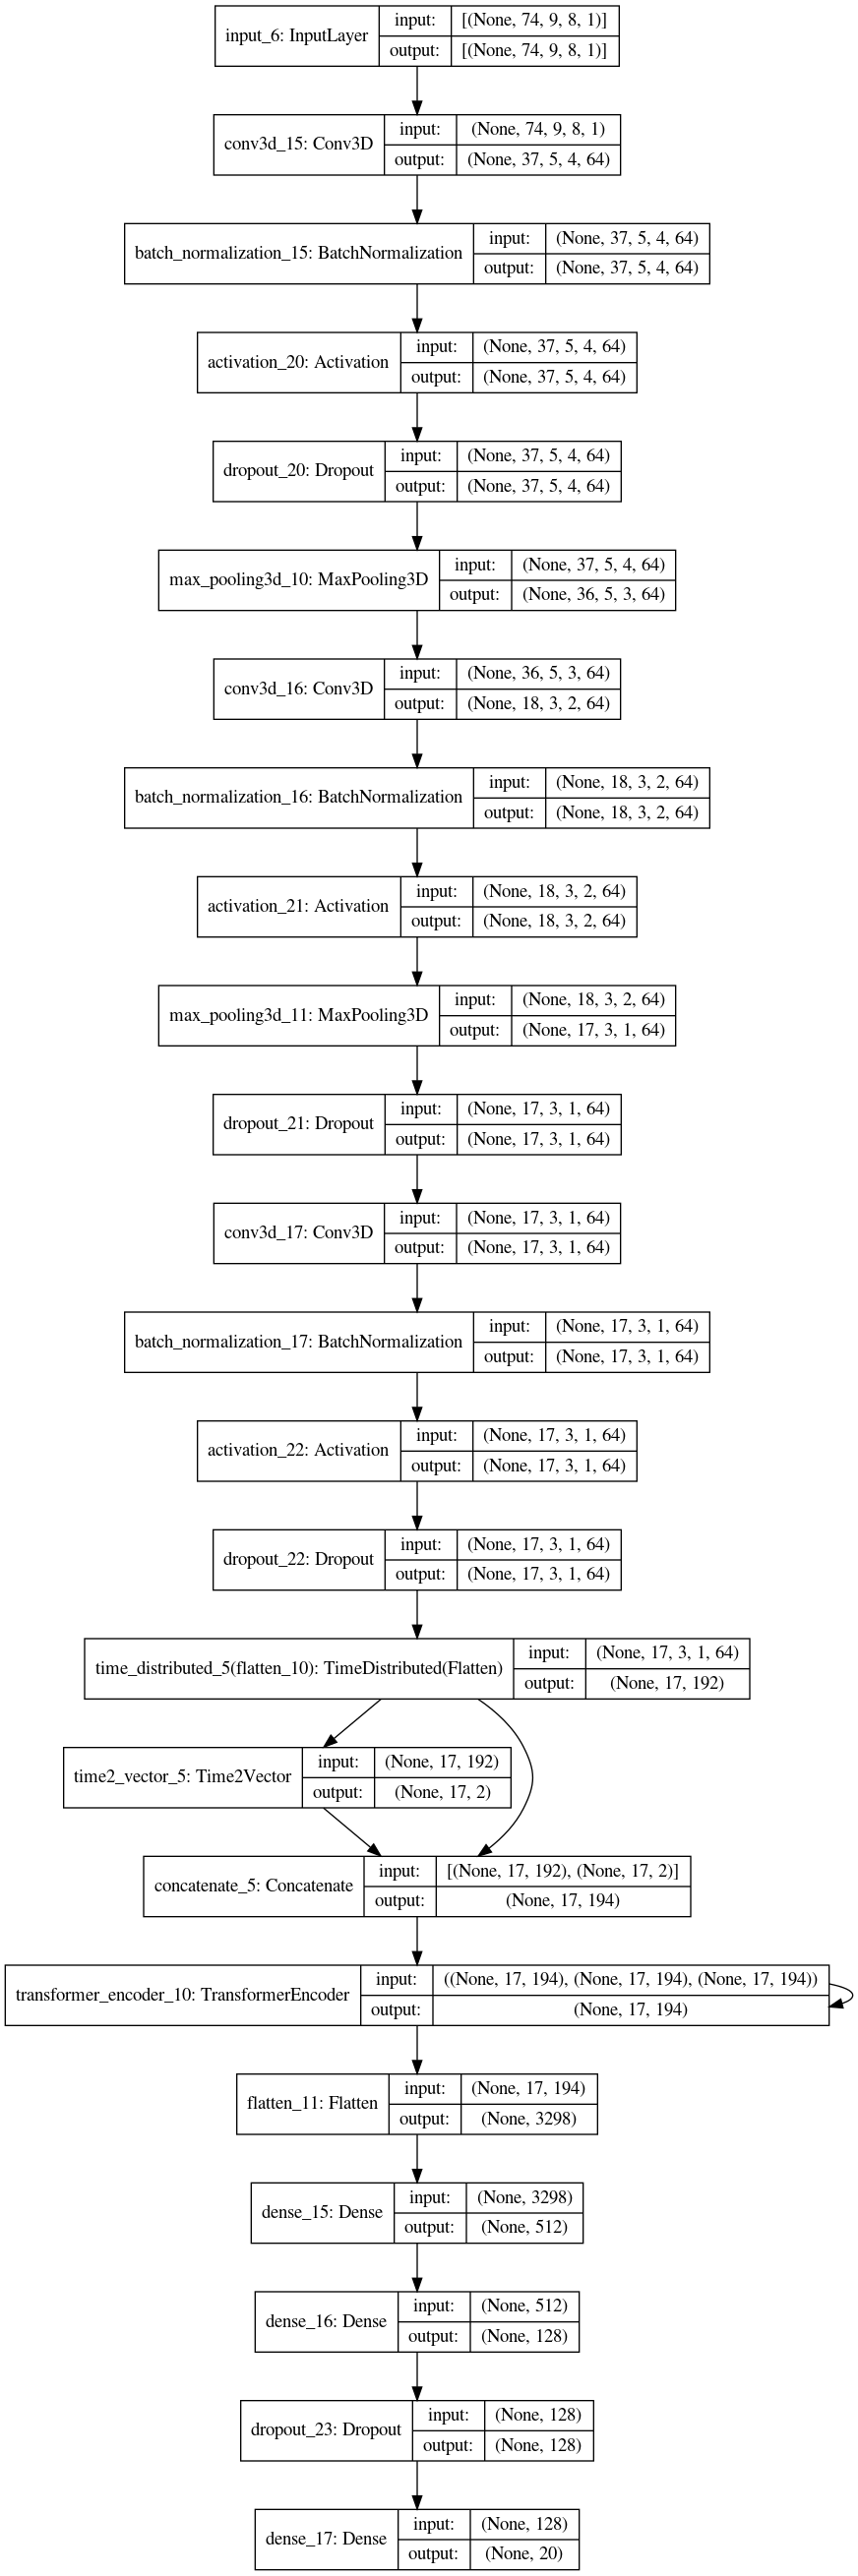

In [177]:
tf.keras.utils.plot_model(model, to_file='/media/naveen/nav/mat_codes/physical_data/transformer/Model1.png',show_shapes=True,show_layer_names=True,dpi=96)

In [178]:
# adam=optimizers.Adam(lr=2.17e-3, beta_1=0.9, beta_2=0.999,epsilon=1e-08, amsgrad=False)
adam=optimizers.Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999,epsilon=1e-08, amsgrad=False)
# sgd=optimizers.SGD(learning_rate=1e-3, momentum=0.9, nesterov=False, name='SGD')
checkpoint_filepath = '/media/naveen/nav/mat_codes/physical_data/transformer/checkpoint.hdf5'
# model.load_weights(checkpoint_filepath) 
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath,verbose=1, monitor='val_accuracy',save_weights_only=True,save_best_only=True)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=0, mode='auto', baseline=None, restore_best_weights=True)
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 74, 9, 8, 1) 0                                            
__________________________________________________________________________________________________
conv3d_15 (Conv3D)              (None, 37, 5, 4, 64) 46720       input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_15 (BatchNo (None, 37, 5, 4, 64) 256         conv3d_15[0][0]                  
__________________________________________________________________________________________________
activation_20 (Activation)      (None, 37, 5, 4, 64) 0           batch_normalization_15[0][0]     
____________________________________________________________________________________________

In [179]:
if tf.test.gpu_device_name(): 

  print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

 print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [180]:
verbose, epochs, batch_size = 0, 200, 64

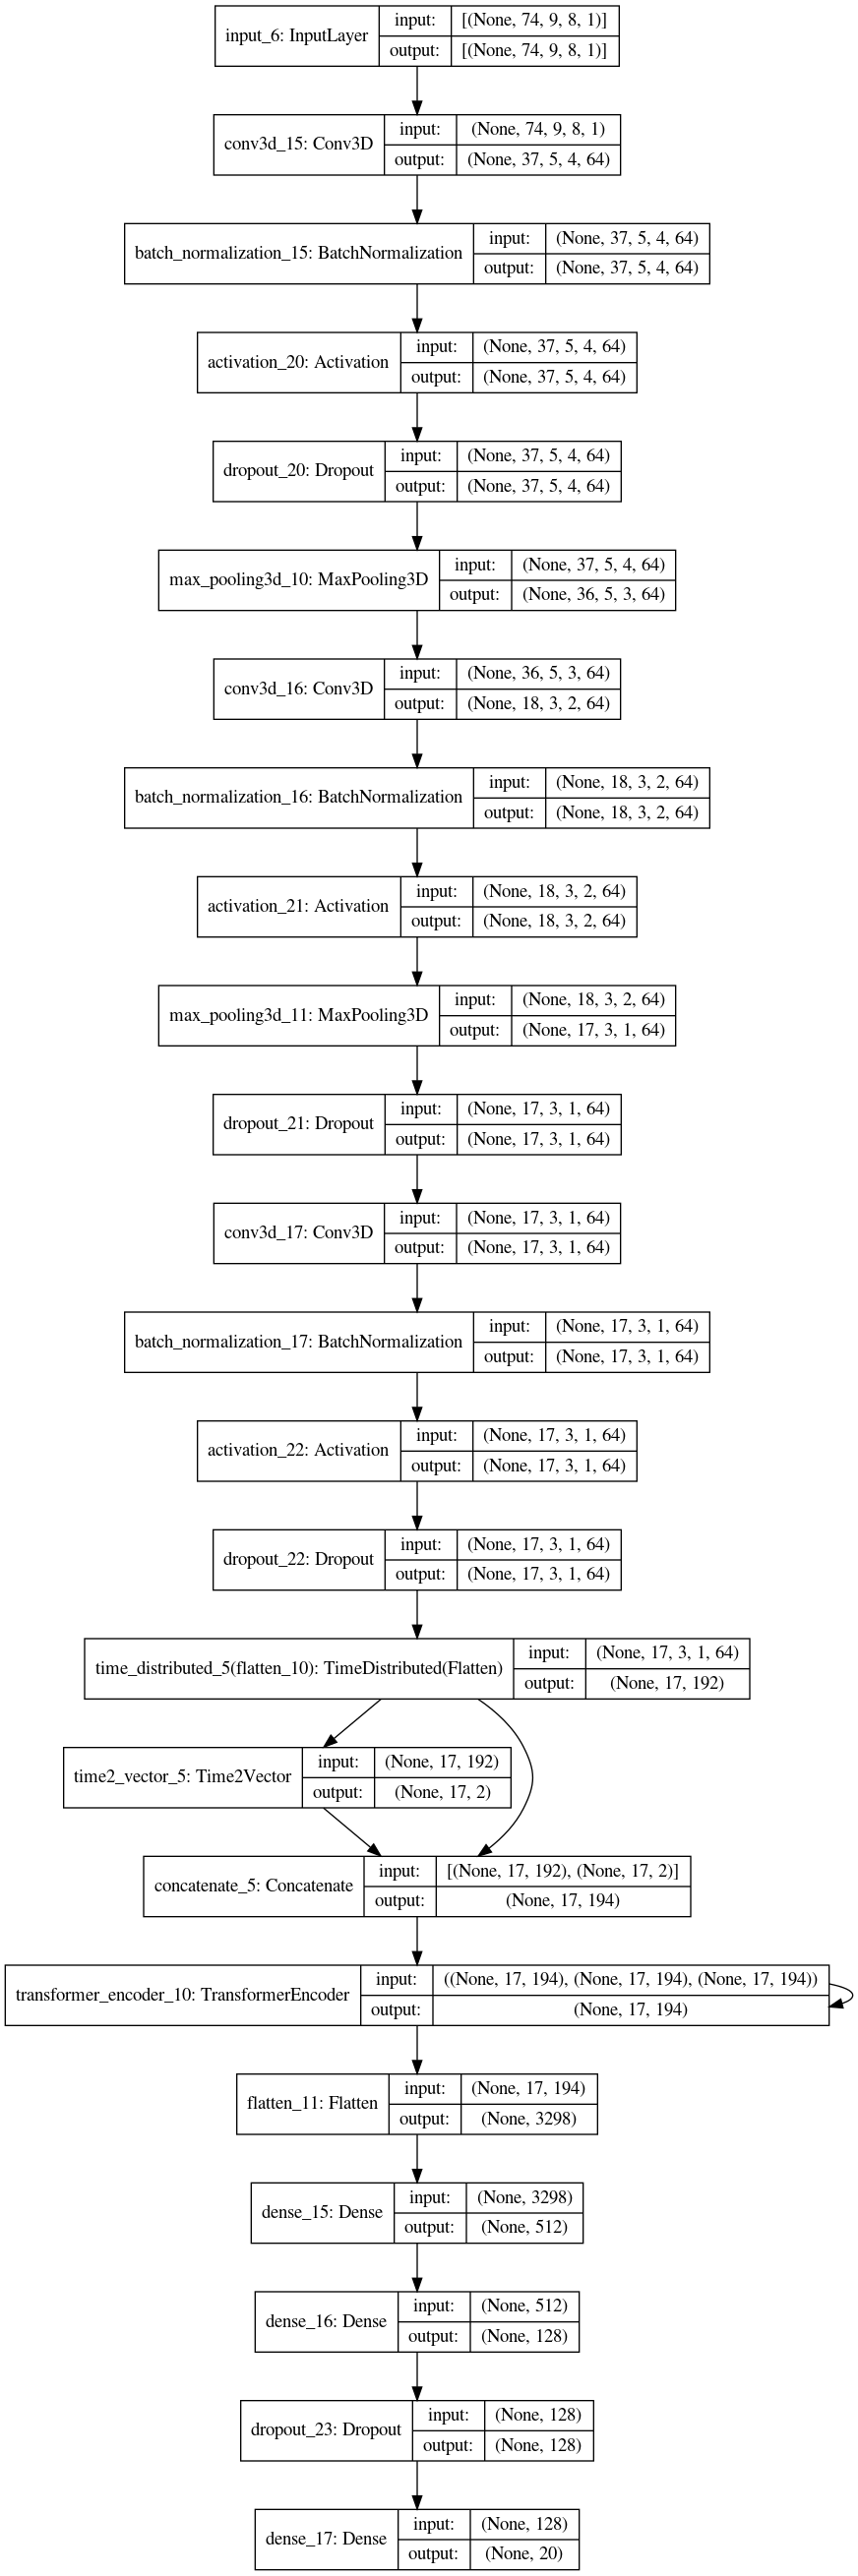

In [181]:
tf.keras.utils.plot_model(model, to_file='/media/naveen/nav/mat_codes/physical_data/transformer/Model1.png',show_shapes=True,show_layer_names=True,dpi=96)

In [182]:
#     tf.keras.utils.plot_model(model, to_file='/media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/CNN20X10/Model1.png',show_shapes=True,show_layer_names=True,dpi=96)
csv_logger = CSVLogger('/media/naveen/nav/mat_codes/physical_data/transformer/LSTM_nina_20X100.csv', append=True, separator=';')
history = model.fit(x_train, y_train_hot, epochs=epochs, batch_size=batch_size, callbacks=[csv_logger,checkpoint_callback,lrate],validation_data=(x_test, y_test_hot), verbose=1)

Epoch 1/200
14/14 [==============================] - 17s 650ms/step - loss: 3.1118 - accuracy: 0.0919 - val_loss: 2.4324 - val_accuracy: 0.1818

Epoch 00001: val_accuracy improved from -inf to 0.18182, saving model to /media/naveen/nav/mat_codes/physical_data/transformer/checkpoint.hdf5
Epoch 2/200
14/14 [==============================] - 8s 544ms/step - loss: 2.6228 - accuracy: 0.1412 - val_loss: 2.3141 - val_accuracy: 0.2038

Epoch 00002: val_accuracy improved from 0.18182 to 0.20376, saving model to /media/naveen/nav/mat_codes/physical_data/transformer/checkpoint.hdf5
Epoch 3/200
14/14 [==============================] - 7s 535ms/step - loss: 2.4784 - accuracy: 0.1775 - val_loss: 2.2829 - val_accuracy: 0.2038

Epoch 00003: val_accuracy did not improve from 0.20376
Epoch 4/200
14/14 [==============================] - 7s 521ms/step - loss: 2.4632 - accuracy: 0.1827 - val_loss: 2.2501 - val_accuracy: 0.2476

Epoch 00004: val_accuracy improved from 0.20376 to 0.24765, saving model to /me

14/14 [==============================] - 7s 526ms/step - loss: 0.9212 - accuracy: 0.7198 - val_loss: 1.2759 - val_accuracy: 0.5549

Epoch 00035: val_accuracy did not improve from 0.58934
Epoch 36/200
14/14 [==============================] - 7s 520ms/step - loss: 0.9897 - accuracy: 0.6960 - val_loss: 1.4712 - val_accuracy: 0.5266

Epoch 00036: val_accuracy did not improve from 0.58934
Epoch 37/200
14/14 [==============================] - 7s 520ms/step - loss: 0.8845 - accuracy: 0.7530 - val_loss: 1.5060 - val_accuracy: 0.5298

Epoch 00037: val_accuracy did not improve from 0.58934
Epoch 38/200
14/14 [==============================] - 7s 519ms/step - loss: 0.8289 - accuracy: 0.7841 - val_loss: 1.5188 - val_accuracy: 0.5361

Epoch 00038: val_accuracy did not improve from 0.58934
Epoch 39/200
14/14 [==============================] - 7s 518ms/step - loss: 0.7886 - accuracy: 0.7757 - val_loss: 1.5625 - val_accuracy: 0.5204

Epoch 00039: val_accuracy did not improve from 0.58934
Epoch 40/200



Epoch 00075: val_accuracy did not improve from 0.59875
Epoch 76/200
14/14 [==============================] - 7s 518ms/step - loss: 0.4027 - accuracy: 0.9252 - val_loss: 1.6357 - val_accuracy: 0.5423

Epoch 00076: val_accuracy did not improve from 0.59875
Epoch 77/200
14/14 [==============================] - 7s 516ms/step - loss: 0.3760 - accuracy: 0.9307 - val_loss: 1.6735 - val_accuracy: 0.5423

Epoch 00077: val_accuracy did not improve from 0.59875
Epoch 78/200
14/14 [==============================] - 7s 530ms/step - loss: 0.3573 - accuracy: 0.9409 - val_loss: 1.6737 - val_accuracy: 0.5392

Epoch 00078: val_accuracy did not improve from 0.59875
Epoch 79/200
14/14 [==============================] - 7s 516ms/step - loss: 0.3674 - accuracy: 0.9334 - val_loss: 1.6497 - val_accuracy: 0.5455

Epoch 00079: val_accuracy did not improve from 0.59875
Epoch 80/200
14/14 [==============================] - 7s 522ms/step - loss: 0.3767 - accuracy: 0.9262 - val_loss: 1.6542 - val_accuracy: 0.5517



Epoch 00116: val_accuracy did not improve from 0.59875
Epoch 117/200
14/14 [==============================] - 7s 518ms/step - loss: 0.3302 - accuracy: 0.9400 - val_loss: 1.7078 - val_accuracy: 0.5235

Epoch 00117: val_accuracy did not improve from 0.59875
Epoch 118/200
14/14 [==============================] - 7s 517ms/step - loss: 0.3537 - accuracy: 0.9310 - val_loss: 1.7665 - val_accuracy: 0.5235

Epoch 00118: val_accuracy did not improve from 0.59875
Epoch 119/200
14/14 [==============================] - 7s 514ms/step - loss: 0.3290 - accuracy: 0.9421 - val_loss: 1.7642 - val_accuracy: 0.5172

Epoch 00119: val_accuracy did not improve from 0.59875
Epoch 120/200
14/14 [==============================] - 7s 517ms/step - loss: 0.2989 - accuracy: 0.9538 - val_loss: 1.7246 - val_accuracy: 0.5298

Epoch 00120: val_accuracy did not improve from 0.59875
Epoch 121/200
14/14 [==============================] - 7s 517ms/step - loss: 0.3329 - accuracy: 0.9430 - val_loss: 1.7716 - val_accuracy: 0.


Epoch 00157: val_accuracy did not improve from 0.59875
Epoch 158/200
14/14 [==============================] - 7s 523ms/step - loss: 0.3283 - accuracy: 0.9415 - val_loss: 1.7606 - val_accuracy: 0.5172

Epoch 00158: val_accuracy did not improve from 0.59875
Epoch 159/200
14/14 [==============================] - 7s 524ms/step - loss: 0.3295 - accuracy: 0.9427 - val_loss: 1.7595 - val_accuracy: 0.5172

Epoch 00159: val_accuracy did not improve from 0.59875
Epoch 160/200
14/14 [==============================] - 7s 525ms/step - loss: 0.3167 - accuracy: 0.9321 - val_loss: 1.7596 - val_accuracy: 0.5172

Epoch 00160: val_accuracy did not improve from 0.59875
Epoch 161/200
14/14 [==============================] - 7s 525ms/step - loss: 0.3346 - accuracy: 0.9353 - val_loss: 1.7621 - val_accuracy: 0.5172

Epoch 00161: val_accuracy did not improve from 0.59875
Epoch 162/200
14/14 [==============================] - 7s 521ms/step - loss: 0.3066 - accuracy: 0.9469 - val_loss: 1.7641 - val_accuracy: 0.


Epoch 00198: val_accuracy did not improve from 0.59875
Epoch 199/200
14/14 [==============================] - 7s 517ms/step - loss: 0.3625 - accuracy: 0.9254 - val_loss: 1.7779 - val_accuracy: 0.5110

Epoch 00199: val_accuracy did not improve from 0.59875
Epoch 200/200
14/14 [==============================] - 7s 522ms/step - loss: 0.3170 - accuracy: 0.9364 - val_loss: 1.7799 - val_accuracy: 0.5110

Epoch 00200: val_accuracy did not improve from 0.59875


In [183]:
# #     tf.keras.utils.plot_model(model, to_file='/media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/CNN20X10/Model1.png',show_shapes=True,show_layer_names=True,dpi=96)
# csv_logger = CSVLogger('/media/naveen/nav/mat_codes/BioPatRec/CNN60X100/LSTM_nina_20X100.csv', append=True, separator=';')
# history = model.fit(x_train, y_train_hot, epochs=epochs, batch_size=batch_size, callbacks=[csv_logger,checkpoint_callback,lrate,early],validation_data=(x_test, y_test_hot), verbose=1)


In [184]:
best_index = history.history['val_accuracy'].index(max(history.history['val_accuracy']))
print('epoch_number',best_index+1)
print('train accuracy and validation accuracy', history.history['accuracy'][best_index], history.history['val_accuracy'][best_index]) 

epoch_number 40
train accuracy and validation accuracy 0.7588168382644653 0.5987460613250732


In [185]:
model.save('/media/naveen/nav/mat_codes/physical_data/transformer/CNN_LSTM_nina_5X97')

INFO:tensorflow:Assets written to: /media/naveen/nav/mat_codes/physical_data/transformer/CNN_LSTM_nina_5X97/assets


INFO:tensorflow:Assets written to: /media/naveen/nav/mat_codes/physical_data/transformer/CNN_LSTM_nina_5X97/assets


history loss
history accuracy
history val_loss
history val_accuracy
history lr


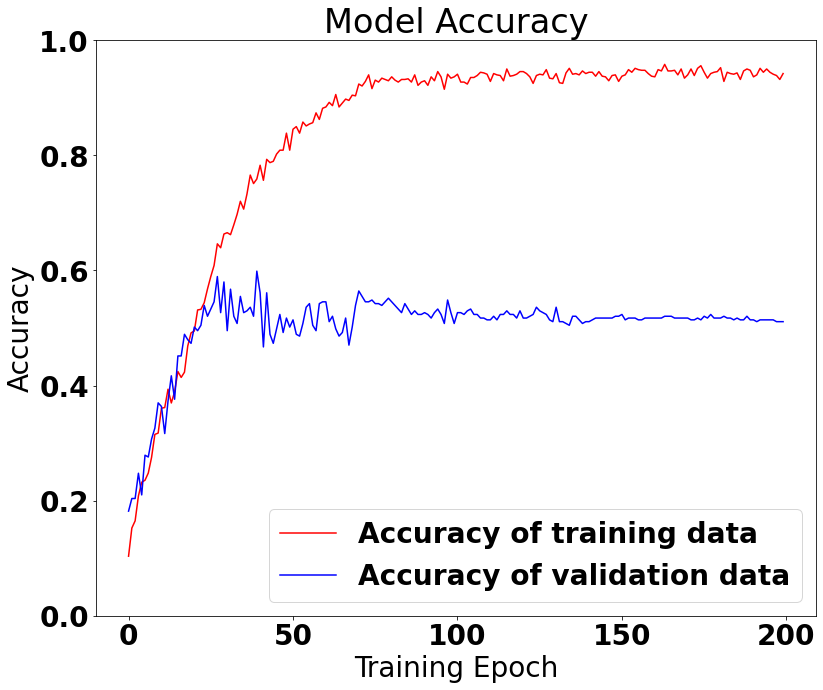

In [186]:
for i in history.history:
    print("history",i)
# facecolor='black'
BPRa=plt.figure(figsize=(10, 8),edgecolor='black')
# ax=figDB4.add_axes(("left", "bottom", "width", "height"))
ax= BPRa.add_axes((1,1,1,1))
ax.spines["top"].set_position(("outward", 0))
ax.spines["bottom"].set_position(("data", 0))
ax.spines["left"].set_position(("axes", 0))
ax.spines["right"].set_position(("outward", 0))

ax.spines["top"].set_color("black")
ax.spines["left"].set_color("black")
ax.spines["right"].set_color("black")
ax.spines["bottom"].set_color("black")

# ax.spines["left"].set_bounds(-.5, .5)
# ax.spines["right"].set_linestyle("--")
# ax.spines["bottom"].set_linewidth(6)
# ax.spines["bottom"].set_capstyle("round")

# plt2.rcParams['figure.facecolor'] = 'white'
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Training Epoch')

# plt2.ylim(0)
# plt2.rcParams['figure.facecolor'] = 'white'

# ax = fig.add_axes((left, bottom, width, height))
ax.set(facecolor="white")
# ax.patch.set_alpha(1.0)
plt.ylim(0)
plt.legend()
plt.show()

history loss
history accuracy
history val_loss
history val_accuracy
history lr


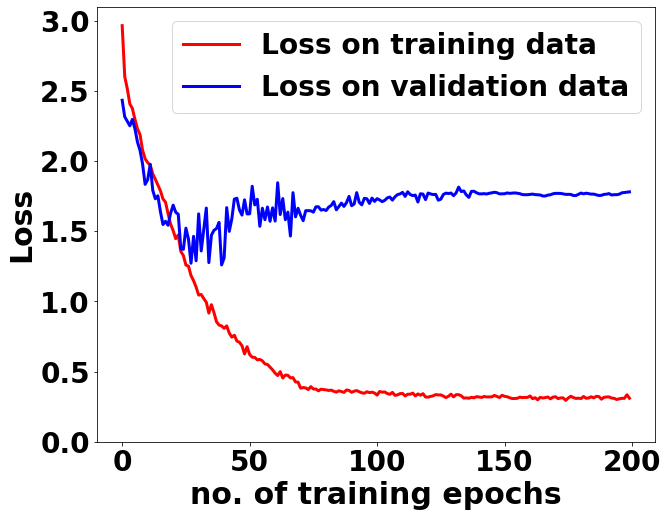

In [187]:
for i in history.history:
    print("history",i)
# facecolor='black'
# ax= figBPR.add_axes((1,1,1,1))
# ax.spines["top"].set_position(("outward", 0))
# ax.spines["bottom"].set_position(("data", 0))
# ax.spines["left"].set_position(("axes", 0))
# ax.spines["right"].set_position(("outward", 0))

# ax.spines["top"].set_color("black")
# ax.spines["left"].set_color("black")
# ax.spines["right"].set_color("black")
# ax.spines["bottom"].set_color("black") 

figBPR=plt.figure(figsize=(10, 8),edgecolor='black')
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 28}

plt.rc('font', **font)

# SMALL_SIZE = 12
# MEDIUM_SIZE = 14
# BIGGER_SIZE = 18

# figBPR.suptitle('test title', fontsize=20)
#plt.rc('xlabel', fontsize=14, weight = 'bold')
#plt.rc('ylabel', fontsize=14, weight = 'bold')

# plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
# plt.rc('axes', labelsize=MEDIUM_SIZE )     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE, weight = 'bold')    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE )  # fontsize of the figure title

# ax=figBPR.add_axes(("left", "bottom", "width", "height"))
# ax= figBPR.add_axes((1,1,1,1))
# ax.spines["top"].set_position(("outward", 0))
# ax.spines["bottom"].set_position(("data", 0))
# ax.spines["left"].set_position(("axes", 0))
# ax.spines["right"].set_position(("outward", 0))

# ax.spines["top"].set_color("black")
# ax.spines["left"].set_color("black")
# ax.spines["right"].set_color("black")
# ax.spines["bottom"].set_color("black")

# ax.spines["left"].set_bounds(-.5, .5)
# ax.spines["right"].set_linestyle("--")

ax.spines["top"].set_linewidth(3)
ax.spines["top"].set_linestyle("-")
ax.spines["bottom"].set_linewidth(3)
ax.spines["bottom"].set_linestyle("-")
ax.spines["left"].set_linewidth(3)
ax.spines["left"].set_linestyle("-")
ax.spines["right"].set_linewidth(3)
ax.spines["right"].set_linestyle("-")
# ax.spines["bottom"].set_capstyle("round")

# plt2.rcParams['figure.facecolor'] = 'white'
plt.plot(history.history['loss'], 'r-', linewidth=3, label='Loss on training data')
plt.plot(history.history['val_loss'], 'b-', linewidth=3, label='Loss on validation data')
# plt.title('Loss curve for BioPatRec DB2',fontsize=18, weight = 'bold')

plt.ylabel('Loss',fontsize=30, weight = 'bold')
plt.xlabel('no. of training epochs',fontsize=30, weight = 'bold')
# plt2.ylim(0)
# plt2.rcParams['figure.facecolor'] = 'white'

# ax = fig.add_axes((left, bottom, width, height))
ax.set(facecolor="white")
# ax.patch.set_alpha(1.0)
plt.ylim(0)
plt.legend()
plt.show()

In [188]:
figBPR.savefig('/media/naveen/nav/plots/physical_data_15X400.eps',transparent=False)
# figBPR.savefig('/media/naveen/nav/plots/BioPatRec_20X300.pdf',transparent=False)

In [189]:
model.load_weights(checkpoint_filepath) 
_, testaccuracy = model.evaluate(x_test, y_test_hot, batch_size=batch_size, verbose=1)
print('test_accuracy',testaccuracy)

5/5 [==============================] - 1s 242ms/step - loss: 1.2594 - accuracy: 0.5987
test_accuracy 0.5987460613250732


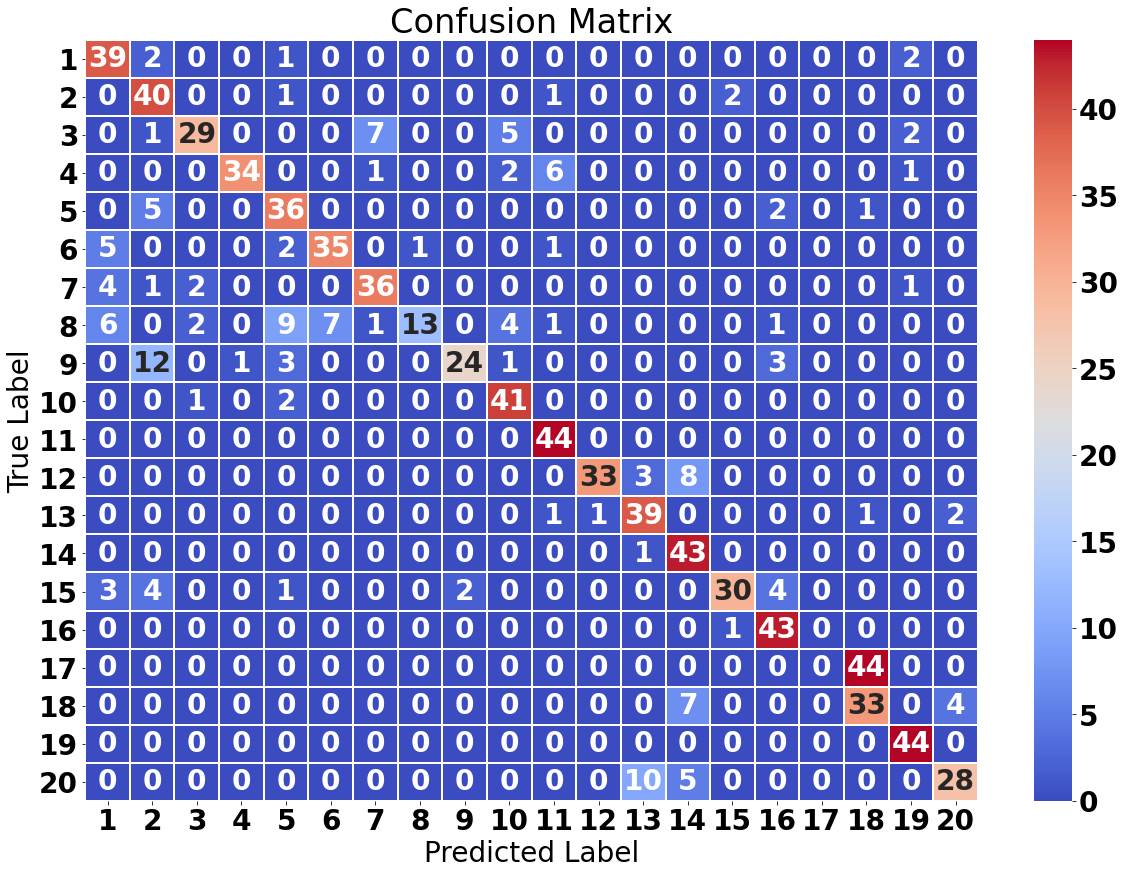

              precision    recall  f1-score   support

           0       0.68      0.89      0.77        44
           1       0.62      0.91      0.73        44
           2       0.85      0.66      0.74        44
           3       0.97      0.77      0.86        44
           4       0.65      0.82      0.73        44
           5       0.83      0.80      0.81        44
           6       0.80      0.82      0.81        44
           7       0.93      0.30      0.45        44
           8       0.92      0.55      0.69        44
           9       0.77      0.93      0.85        44
          10       0.81      1.00      0.90        44
          11       0.97      0.75      0.85        44
          12       0.74      0.89      0.80        44
          13       0.68      0.98      0.80        44
          14       0.91      0.68      0.78        44
          15       0.81      0.98      0.89        44
          16       0.00      0.00      0.00        44
          17       0.42    

/home/naveen/anaconda3/envs/ds_tf_gpu/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/naveen/anaconda3/envs/ds_tf_gpu/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/naveen/anaconda3/envs/ds_tf_gpu/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

In [190]:
y_pred_train = model.predict(x_train)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
#max_y_train = np.argmax(y_train, axis=1)
show_confusion_matrix(y_train, max_y_pred_train)
print(classification_report(y_train, max_y_pred_train))

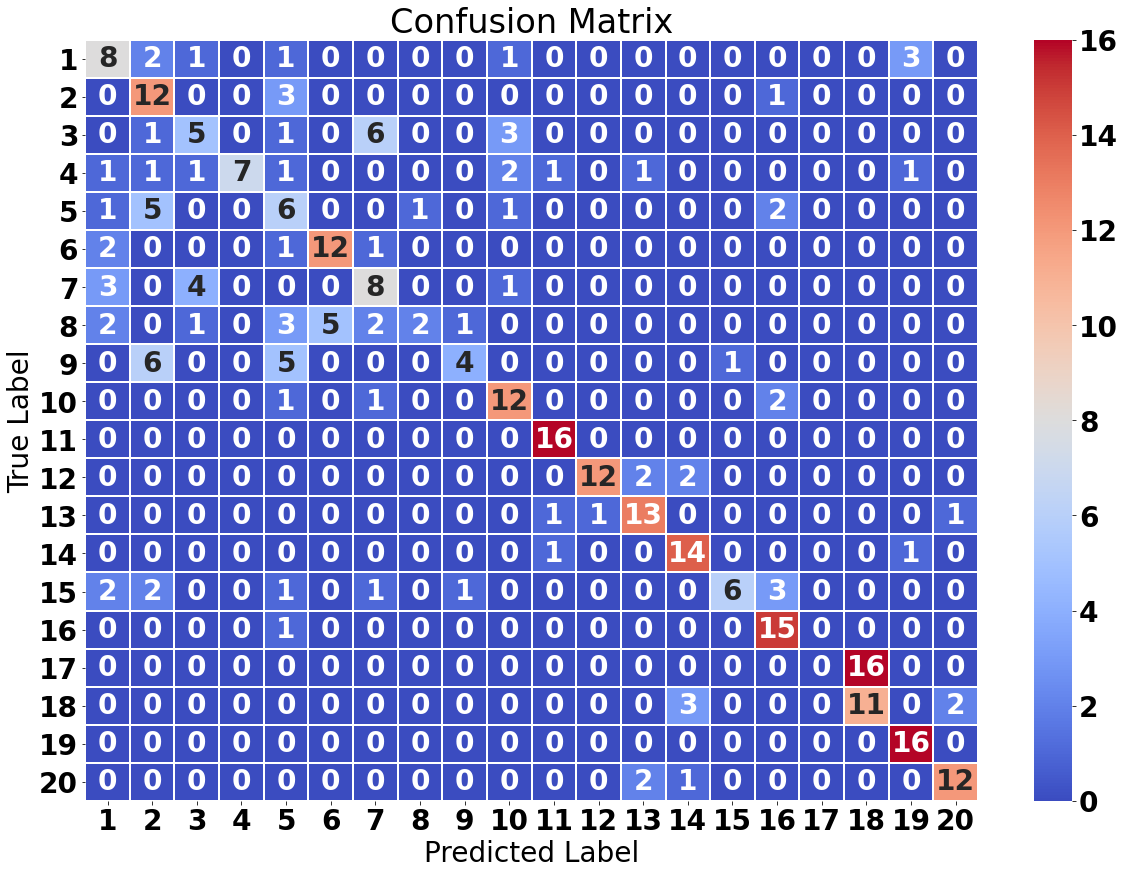

              precision    recall  f1-score   support

           0       0.42      0.50      0.46        16
           1       0.41      0.75      0.53        16
           2       0.42      0.31      0.36        16
           3       1.00      0.44      0.61        16
           4       0.25      0.38      0.30        16
           5       0.71      0.75      0.73        16
           6       0.42      0.50      0.46        16
           7       0.67      0.12      0.21        16
           8       0.67      0.25      0.36        16
           9       0.60      0.75      0.67        16
          10       0.84      1.00      0.91        16
          11       0.92      0.75      0.83        16
          12       0.72      0.81      0.76        16
          13       0.70      0.88      0.78        16
          14       0.86      0.38      0.52        16
          15       0.65      0.94      0.77        16
          16       0.00      0.00      0.00        16
          17       0.41    

/home/naveen/anaconda3/envs/ds_tf_gpu/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/naveen/anaconda3/envs/ds_tf_gpu/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/naveen/anaconda3/envs/ds_tf_gpu/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

In [191]:
y_pred_test = model.predict(x_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test_hot, axis=1)
show_confusion_matrix(max_y_test, max_y_pred_test)
print(classification_report(max_y_test, max_y_pred_test))